# Import the data

In [1]:
# importing the data
import pandas as pd
import numpy as np
import sqlite3
df = pd.read_csv("data/kc_house_data.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
print(df.shape)
print("\n")
df.info()

(21597, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ M

# Check for dupes

In [3]:
# look for duplicates - no dupes
duplicate_rows_df = df[df.duplicated()]
print(len(duplicate_rows_df))

0


# Extraneous values

In [4]:
# preview 5 most frequent values of a col in a loop, for each string col.
# looking for extraneous values and getting to know the data
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
    print('\n')

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

In [5]:
# replace extraneous value '?' in 'sqft_basement' col to equal 0 as that is majority of values
# convert to type to float
df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

In [6]:
# check it worked
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

# Null values

In [7]:
# check for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# drop waterfront and view since I don't care about those
df = df.drop('waterfront', axis=1)
df = df.drop('view', axis=1)
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [9]:
# how much is missing from year renovated - 18%
# printed most common values so that we know what to replace the nulls with
print('Percentage of Null yr_renovated Values:', len(df[df.yr_renovated.isna()])/ len(df))
print('Number of Unique yr_renovated Values:', df.yr_renovated.nunique())
print('Number of Unique Values:', df.yr_renovated.value_counts())

Percentage of Null yr_renovated Values: 0.17789507802009538
Number of Unique yr_renovated Values: 70
Number of Unique Values: 0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [10]:
# convert nan to 0 
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0

In [11]:
# check it worked -- converting the 0 did not just come in as '0' , it came in correctly as 0.0
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [12]:
# check it worked - null values filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 3.1+ MB


In [13]:
# Converting date to datetime
df.date = pd.to_datetime(df.date)

# DEALING WITH CATEGORICAL DATA AND CREATING DUMMY VARIABLES:

In [14]:
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [15]:
drop_vars = ['date', 'yr_built', 'yr_renovated', 'zipcode','lat','long']
df.drop(columns=drop_vars, axis=1, inplace=True)

In [16]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1800,7503


In [17]:
con_feats = ['sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement','sqft_living15','sqft_lot15']
cat_feats = ['condition', 'grade']

In [18]:
dummy = pd.get_dummies(df[cat_feats], drop_first=True)

In [19]:
dummy

,condition,grade
0,3,7
1,3,7
2,3,6
3,5,7
4,3,8
...,...,...
21592,3,8
21593,3,8
21594,3,7
21595,3,8


In [20]:
df = pd.concat([df, dummy], axis = 1)
df = df.drop(['fuel_type', 'cylinders', 'trans_type',
            'Driven_Wheels', 'num_doors', 'vehicle_size', 'vehicle_style'], axis=1)
df.info()

KeyError: "['fuel_type' 'cylinders' 'trans_type' 'Driven_Wheels' 'num_doors'\n 'vehicle_size' 'vehicle_style'] not found in axis"

# Dealing with Outliers

In [21]:
from numpy import mean
from numpy import std

In [24]:
sns.boxplot(x=df['price'])

NameError: name 'sns' is not defined

In [27]:
# calculate summary statistics
data_mean, data_std = mean(df.price), std(df.price)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [28]:
# identify outliers
outliers = [x for x in df.price if x < lower or x > upper]

In [29]:
sorted(outliers)

[1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1660000.0,
 1660000.0,
 1660000.0,
 1660000.0,
 1670000.0,
 1670000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1720000.0,
 1720000.0,
 1720000.0,
 1730000.0,
 1730000.0,
 1730000.0,
 1730000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 175

In [ ]:
#subset msrp to eliminate outliers --- this is how we would do it, but don't want to yet
# df = df[df.price < 1650000.0]

# EDA with visualizations

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

In [31]:
# .round() takes it out of scientific notation
df['price'].describe().round()

count      21597.0
mean      540297.0
std       367368.0
min        78000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

In [32]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(df.date.dt.month == i))
    
plt.figure(figsize=(12,4))
sns.barplot(months, monthly_sales)
plt.title('Sales by month', fontdict={'fontsize': 16})
plt.show()

AttributeError: 'DataFrame' object has no attribute 'date'

In [33]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_sales = []

for i in range(0,7):
    daily_sales.append(sum(df.date.dt.dayofweek == i))

plt.figure(figsize=(12,4))
sns.barplot(day_of_week,daily_sales)
plt.title('Sales by Days', fontdict={'fontsize': 16})
plt.show()

AttributeError: 'DataFrame' object has no attribute 'date'

# Create new column based on conditions

In [34]:
# upper class = 1
# middle class = 2
# lower class = 3

df.loc[df['price'] > 750000, 'class_scale'] = 1
df.loc[(df['price'] < 750000) & (df['price'] > 350000), 'class_scale'] = 2
df.loc[df['price'] < 350000, 'class_scale'] = 3

In [35]:
grouped = df.groupby(['class_scale'])['price', 'grade'].agg(['mean','min', 'max', 'std']).round()
grouped.head()

KeyError: 'Columns not found: '

In [36]:
# upper class = 17%
# middle class = 52% 
# lower class = 31%
df.class_scale.value_counts()

2.0    11145
3.0     6614
1.0     3579
Name: class_scale, dtype: int64

In [37]:
%pip install uszipcode

Note: you may need to restart the kernel to use updated packages.


In [38]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True) # set simple_zipcode=False to use rich info database
zipcode = search.by_zipcode("10001")
zipcode

SimpleZipcode(zipcode='10001', zipcode_type='Standard', major_city='New York', post_office_city='New York, NY', common_city_list=['New York'], county='New York County', state='NY', lat=40.75, lng=-73.99, timezone='Eastern', radius_in_miles=0.9090909090909091, area_code_list=['718', '917', '347', '646'], population=21102, population_density=33959.0, land_area_in_sqmi=0.62, water_area_in_sqmi=0.0, housing_units=12476, occupied_housing_units=11031, median_home_value=650200, median_household_income=81671, bounds_west=-74.008621, bounds_east=-73.984076, bounds_north=40.759731, bounds_south=40.743451)

In [39]:
df.zipcode.nunique()

AttributeError: 'DataFrame' object has no attribute 'zipcode'

In [40]:
zipcode.to_dict()

{'zipcode': '10001',
 'zipcode_type': 'Standard',
 'major_city': 'New York',
 'post_office_city': 'New York, NY',
 'common_city_list': ['New York'],
 'county': 'New York County',
 'state': 'NY',
 'lat': 40.75,
 'lng': -73.99,
 'timezone': 'Eastern',
 'radius_in_miles': 0.9090909090909091,
 'area_code_list': ['718', '917', '347', '646'],
 'population': 21102,
 'population_density': 33959.0,
 'land_area_in_sqmi': 0.62,
 'water_area_in_sqmi': 0.0,
 'housing_units': 12476,
 'occupied_housing_units': 11031,
 'median_home_value': 650200,
 'median_household_income': 81671,
 'bounds_west': -74.008621,
 'bounds_east': -73.984076,
 'bounds_north': 40.759731,
 'bounds_south': 40.743451}

In [41]:
res = search.by_population(lower=0, upper=999999999,
sort_by=zipcode.population, ascending=False, returns=10)
for zipcode in res:
    print(zipcode)

AttributeError: 'int' object has no attribute 'name'

In [42]:
zcode = pd.DataFrame(df['zipcode'])
print (zcode)

KeyError: 'zipcode'

In [43]:
# from osgeo import gdal, ogr, osr
# from fiona.ogrext import Iterator, ItemsIterator, KeysIterator
from geopandas import GeoDataFrame
gdal.VersionInfo()

ModuleNotFoundError: No module named 'geopandas'

In [44]:
def zco(x):
    if pd.isnull(x):
        return None
    else:
        city = search.by_zipcode(int(x))['City']
        return city if city else x

zcode['City'] = zcode['zipcode'].apply(zco)
print (zcode)

NameError: name 'zcode' is not defined

In [45]:
def zco(x):
    if pd.isnull(x):
        return None
    else:
        city = search.by_zipcode(int(x))['City']
        return city if city else x

zcode['City'] = zcode['zipcode'].apply(zco)
print (zcode)

NameError: name 'zcode' is not defined

In [ ]:
df.cut(['price'], 3, )

In [46]:
pd.plotting.scatter_matrix()

TypeError: scatter_matrix() missing 1 required positional argument: 'frame'

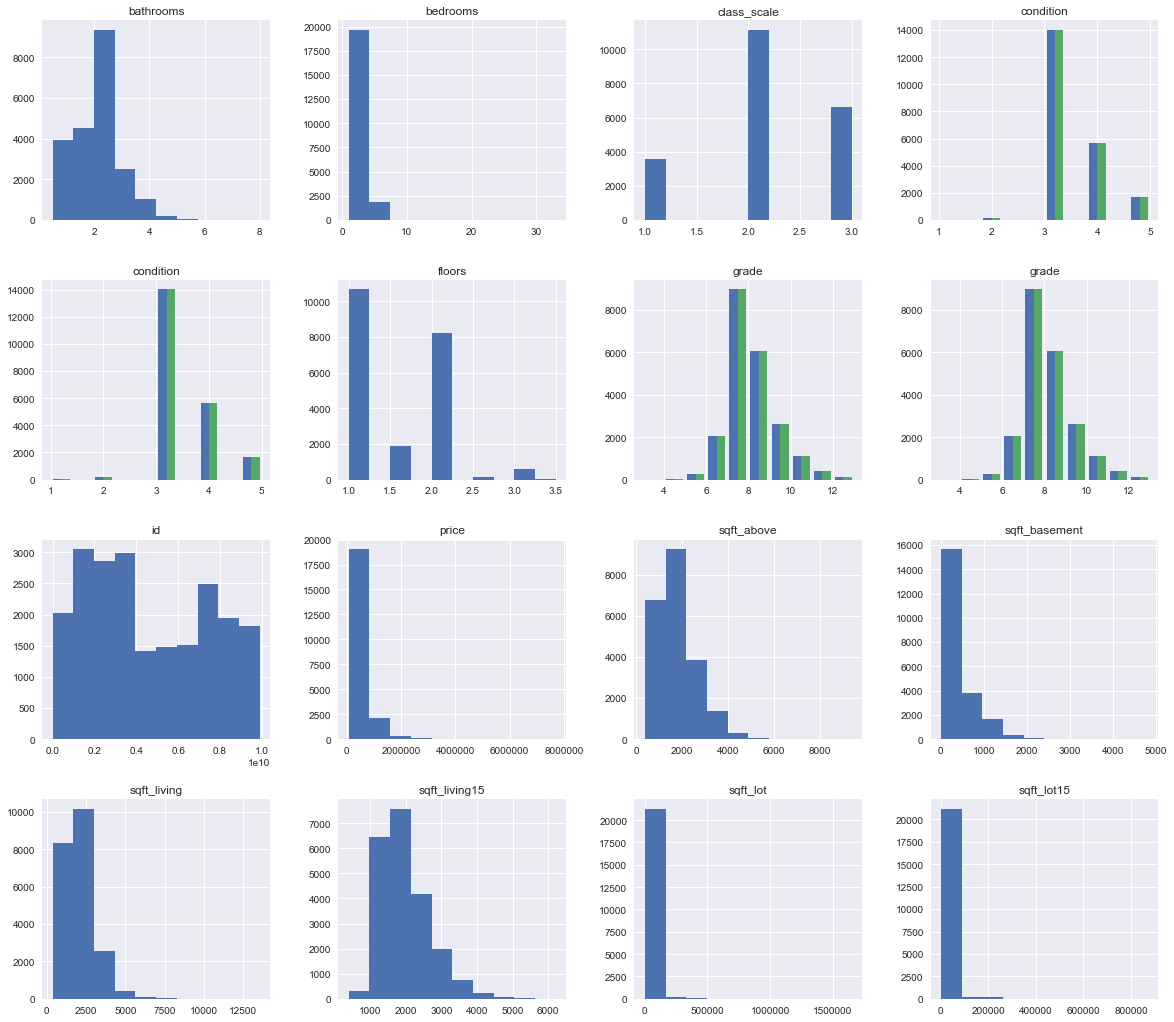

In [47]:
# create histograms for all numeric columns to get idea of distributions
df.hist(figsize = (20,18));

# Homoscedasticity

Check Linearity for each column. Does col[x] have a linear relationship with price?

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


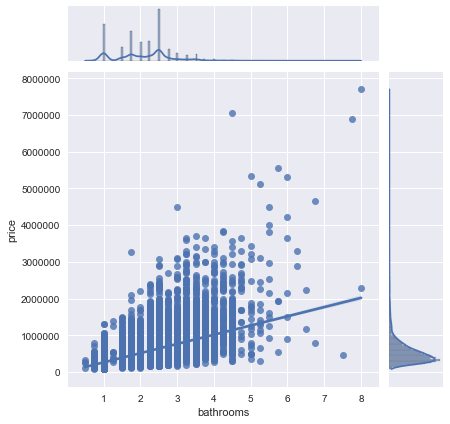

In [48]:
# use jointplot to check for linearity 
sns.jointplot('bathrooms','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


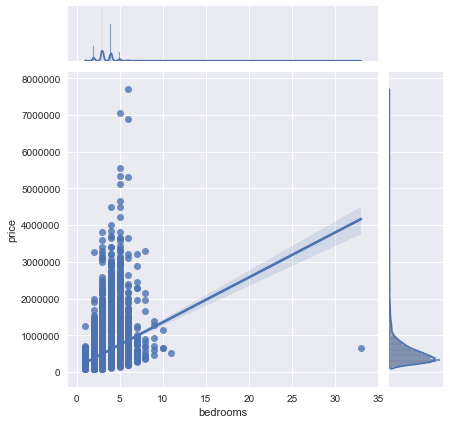

In [49]:
sns.jointplot('bedrooms','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: Shape of passed values is (2, 3), indices imply (21597, 3)

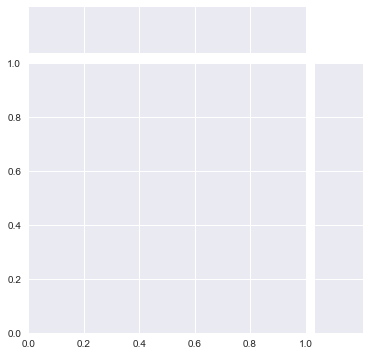

In [50]:
sns.jointplot('condition','price', data=df, kind='reg');

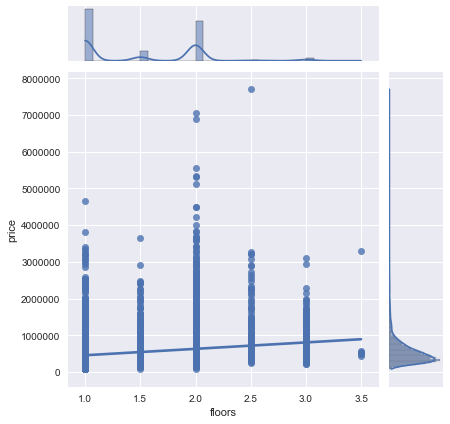

In [51]:
sns.jointplot('floors','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: Shape of passed values is (2, 3), indices imply (21597, 3)

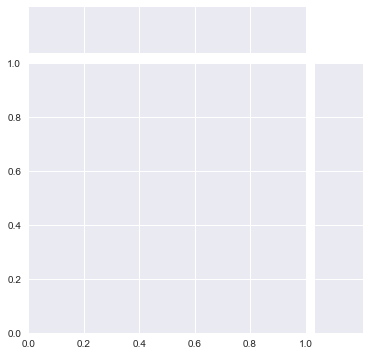

In [52]:
sns.jointplot('grade','price', data=df, kind='reg');

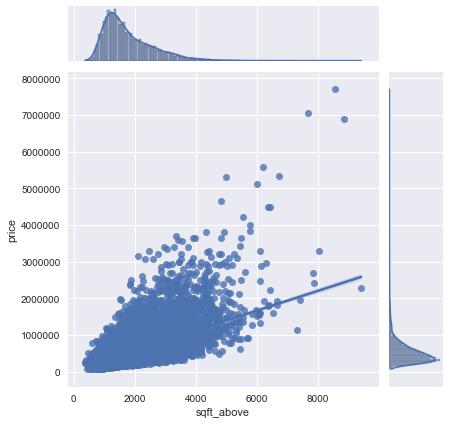

In [53]:
sns.jointplot('sqft_above','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


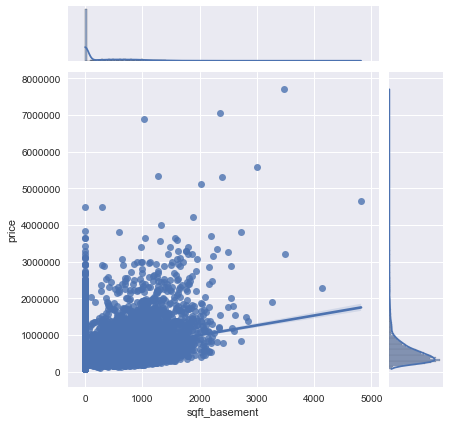

In [54]:
sns.jointplot('sqft_basement','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: Could not interpret value `yr_built` for parameter `x`

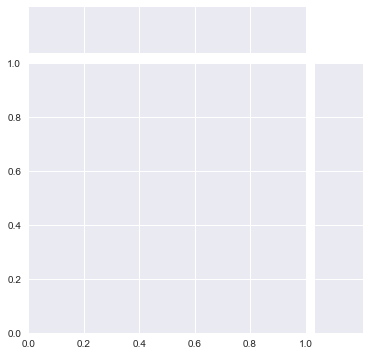

In [55]:
sns.jointplot('yr_built','price', data=df, kind='reg');

ValueError: Could not interpret value `yr_renovated` for parameter `x`

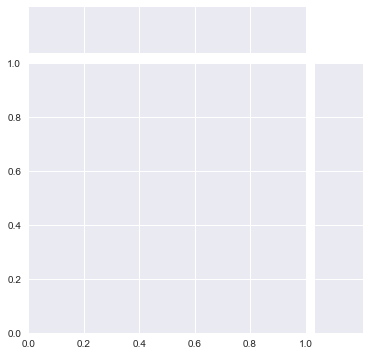

In [56]:
sns.jointplot('yr_renovated','price', data=df, kind='reg');

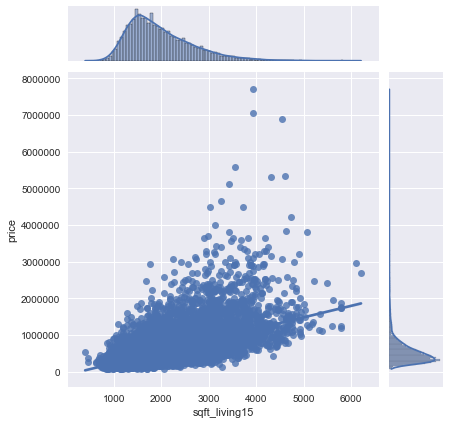

In [57]:
sns.jointplot('sqft_living15','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


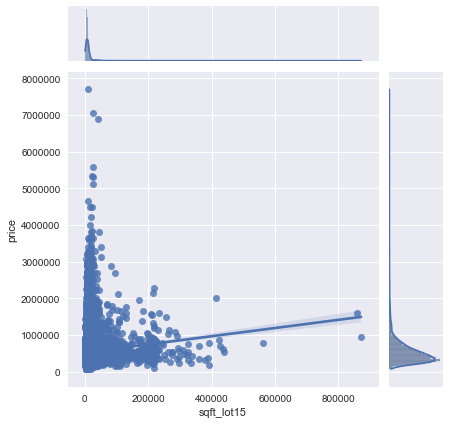

In [58]:
sns.jointplot('sqft_lot15','price', data=df, kind='reg');

# Multicolinearity: 'bathrooms','bedrooms', 'grade' ,'sqft_above', 'sqft_living15','sqft_lot15' have strong linear relationships to price

floors and condition have little to no linear relationship to price

In [59]:
# checking for multicolinearity across those that had highest linear correlation
# keep grade, bedrooms, bathrooms
# grade, sqft_living15, and sqft_above all have too high multicolinearity (above 65%) so only need one
feats = ['bathrooms','bedrooms', 'grade' ,'sqft_above', 'sqft_living15','sqft_lot15']
corr = df[feats].corr()
corr

,bathrooms,bedrooms,grade,grade,sqft_above,sqft_living15,sqft_lot15
bathrooms,1.000000,0.514508,0.665838,0.665838,0.686668,0.569884,0.088303
bedrooms,0.514508,1.000000,0.356563,0.356563,0.479386,0.393406,0.030690
grade,0.665838,0.356563,1.000000,1.000000,0.756073,0.713867,0.120981
grade,0.665838,0.356563,1.000000,1.000000,0.756073,0.713867,0.120981
sqft_above,0.686668,0.479386,0.756073,0.756073,1.000000,0.731767,0.195077
sqft_living15,0.569884,0.393406,0.713867,0.713867,0.731767,1.000000,0.183515
sqft_lot15,0.088303,0.030690,0.120981,0.120981,0.195077,0.183515,1.000000


# Check with heatmap:

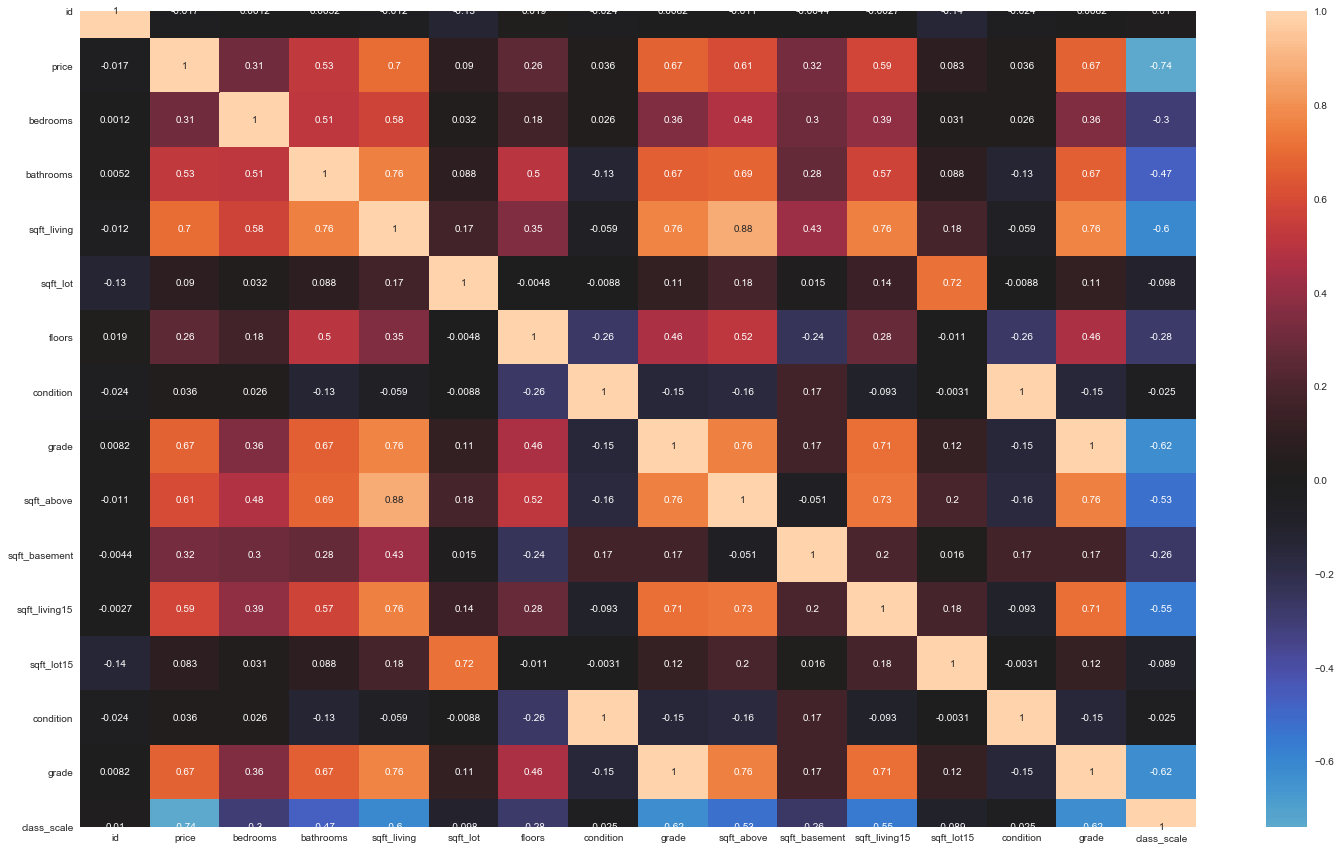

In [60]:

plt.figure(figsize=[25,15])
sns.heatmap(df.corr(), center=0, annot=True);

# Check multicolinearity with The Variance Inflation

In [61]:
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

MissingDataError: exog contains inf or nans

# Vanilla Model

In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [65]:
f = 'price~grade'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:04:36   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade[0]    1.046e+05    792.895    131.895      0.000    1.03e+05    1.06e+05
grade[1]    1.046e+05    792.895    131.895      0.000    1.03e+05    1.06e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                     6.68e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.85e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [66]:
model.params

Intercept   -1.061416e+06
grade[0]     1.045789e+05
grade[1]     1.045789e+05
dtype: float64

In [67]:
# create a DataFrame with the minimum and maximum values of bathrooms
X_new = pd.DataFrame({'grade': [df.bathrooms.min(), df.bathrooms.max()]})
print(X_new.head())

# make predictions for those x values and store them
preds = model.predict(X_new) #predicts the start/end of line
print (preds)

# first, plot the observed data and the least squares line
df.plot(kind='scatter', x='grade', y='price')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

   grade
0    0.5
1    8.0


PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
when evaluating factor grade, I got 2 columns instead of the 1 I was expecting
    price~grade
          ^^^^^

In [68]:

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)
plt.show()

ValueError: 'grade' is not in list

<Figure size 1080x576 with 0 Axes>

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


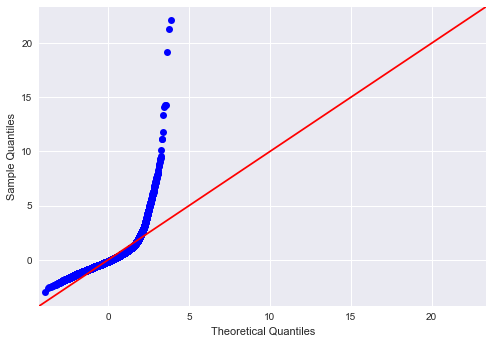

In [69]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
# consider dropping outliers, log scaling my target, or a different type of model

In [70]:
print(x_cols)

['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'condition', 'grade', 'class_scale']


In [71]:
train, test = train_test_split(df)

In [72]:
print(len(train), len(test))

16197 5400


In [73]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     2607.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:04:55   Log-Likelihood:            -2.1859e+05
No. Observations:               15995   AIC:                         4.372e+05
Df Residuals:                   15981   BIC:                         4.373e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.933e+05   2.43e+04     16.190      0.000    3.46e+05    4.41e+05
id             -1.75e-06   5.81e-07     -3.013      0.003   -2.89e-06   -6.11e-07
bedrooms      -4.003e+04   2239.925    -17.873      0.000   -4.44e+04   -3.56e+04
bathrooms     -8811.8498   3682.137     -2.393      0.017    -1.6e+04   -1594.447
sqft_living     142.8829     21.944      6.511      0.000      99.871     185.895
sqft_lot         -0.0737      0.055     -1.332      0.183      -0.182       0.035
floors        -2.066e+04   4220.071     -4.897      0.000   -2.89e+04   -1.24e+04
condition[0]   1.731e+04   1338.126     12.939      0.000    1.47e+04    1.99e+04
condition[1]   1.731e+04   1338.126     12.939      0.000    1.47e+04    1.99e+04
grade[0]       2.776e+04   1306.148     21.250      0.000    2.52e+04    3.03e+04
grade[1]       2.776e+04   1306.148     21.250      0.000    2.52e+04    3.03e+04
sqft_above       19.7074     21.954      0.898      0.369     -23.325      62.740
sqft_basement    42.0775     21.806      1.930      0.054      -0.665      84.820
sqft_living15   -11.5423      4.035     -2.860      0.004     -19.452      -3.632
sqft_lot15       -0.5545      0.087     -6.402      0.000      -0.724      -0.385
class_scale   -2.406e+05   3297.911    -72.960      0.000   -2.47e+05   -2.34e+05
==============================================================================
Omnibus:                    16851.910   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2639202.191
Skew:                           5.000   Prob(JB):                         0.00
Kurtosis:                      65.129   Cond. No.                     3.26e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.39e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
y = df['price']
cols = x_cols
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


MissingDataError: exog contains inf or nans

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [76]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# SK Learn

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#create X and y 
features = ['bedrooms']
X = df[features]
y = df.price

#instiatiate and fit 
slr = LinearRegression()
slr.fit(X, y)

#print coefficients 
print(slr.intercept_)
print(slr.coef_)

127199.51268533332
[122464.4441742]


# Feature Scaling and Normalizing the Data

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df[['grade', 'sqft_living15']]
y = df['price']
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,condition,grade,class_scale
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1340,5650,3,7,3.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1690,7639,3,7,2.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,2720,8062,3,6,3.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1360,5000,5,7,2.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1800,7503,3,8,2.0


Check distributions of features
- closest one to being normal is sqft_living15

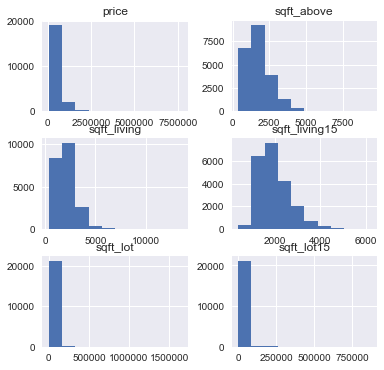

In [79]:
df[['price', 'sqft_living', 'sqft_lot', 'sqft_living15','sqft_above','sqft_lot15']].hist(figsize  = [6, 6]); 

Log scale and make them all normally distributed

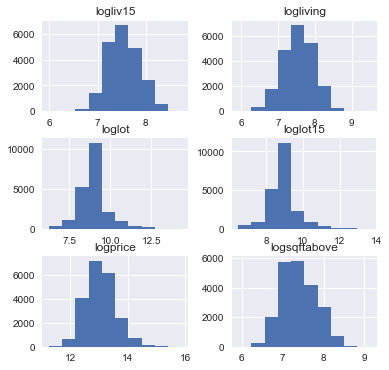

In [80]:
import numpy as np
data_log = pd.DataFrame([])
data_log['logprice'] = np.log(df['price'])
data_log['logliving'] = np.log(df['sqft_living'])
data_log['loglot'] = np.log(df['sqft_lot'])
data_log['logliv15'] = np.log(df['sqft_living15'])
data_log['logsqftabove'] = np.log(df['sqft_above'])
data_log['loglot15'] = np.log(df['sqft_lot15'])
data_log.hist(figsize  = [6, 6]);

Now perform min-max scaling

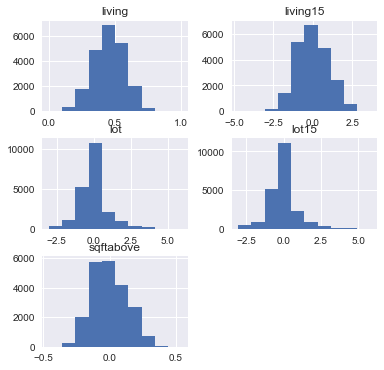

In [89]:
# just giving them a variable name
logprice = data_log['logprice']
logliv = data_log['logliving']
loglot = data_log['loglot']
logliv15 = data_log['logliv15']
logsqftabove = data_log['logsqftabove']
loglot15 = data_log['loglot15']


# min-max scaling
scaled_living = (logliv - min(logliv)) / (max(logliv) - min(logliv))
# standardization 
scaled_lot = (loglot - np.mean(loglot)) / np.sqrt(np.var(loglot))
scaled_lot15 = (loglot15 - np.mean(loglot15)) / np.sqrt(np.var(loglot15))
scaled_living15 = (logliv15 - np.mean(logliv15)) / np.sqrt(np.var(logliv15))
# mean normalization
scaled_sqftabove = (logsqftabove - np.mean(logsqftabove)) / (max(logsqftabove) - min(logsqftabove))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['living'] = scaled_living
data_cont_scaled['lot'] = scaled_lot
data_cont_scaled['living15'] = scaled_living15
data_cont_scaled['sqftabove'] = scaled_sqftabove
data_cont_scaled['lot15'] = scaled_lot15

data_cont_scaled.hist(figsize = [6, 6]);

In [90]:
data_cont_scaled.head()

,living,lot,living15,sqftabove,lot15
0,0.322166,-0.388439,-1.035453,-0.099467,-0.395459
1,0.538392,-0.113243,-0.326789,0.088792,-0.024288
2,0.203585,0.244481,1.126531,-0.231382,0.042037
3,0.463123,-0.523926,-0.990210,-0.135537,-0.545863
4,0.420302,0.008140,-0.134221,0.009704,-0.046395


# SKLearn Standardization and Min-Max scaling: 

In [99]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['sqft_living', 'sqft_lot','sqft_living15','sqft_above','sqft_lot15']])
df_std = std_scale.transform(df[['sqft_living', 'sqft_lot','sqft_living15','sqft_above','sqft_lot15']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['sqft_living', 'sqft_lot','sqft_living15','sqft_above','sqft_lot15']])
df_minmax = minmax_scale.transform(df[['sqft_living', 'sqft_lot','sqft_living15','sqft_above','sqft_lot15']])

In [101]:
print('Mean after standardization:\nsqft_living={:.2f}, sqft_lot={:.2f}, sqft_living15={:.2f}, sqft_above={:.2f}, sqft_lot15={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean(), df_std[:,2].mean(), df_std[:,3].mean(), df_std[:,4].mean()))
print('\nStandard deviation after standardization:\nsqft_living={:.2f}, sqft_lot={:.2f}, sqft_living15={:.2f}, sqft_above={:.2f}, sqft_lot15={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std(), df_std[:,2].std(), df_std[:,3].std(), df_std[:,4].std()))

Mean after standardization:
sqft_living=-0.00, sqft_lot=0.00, sqft_living15=-0.00, sqft_above=0.00, sqft_lot15=0.00

Standard deviation after standardization:
sqft_living=1.00, sqft_lot=1.00, sqft_living15=1.00, sqft_above=1.00, sqft_lot15=1.00


In [102]:
print('Min-value after min-max scaling:\nsqft_living={:.2f}, sqft_lot={:.2f}, sqft_living15={:.2f}, sqft_above={:.2f}, sqft_lot15={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min(), df_minmax[:,2].min(), df_minmax[:,3].min(), df_minmax[:,4].min()))
print('\nMax-value after min-max scaling:\nsqft_living={:.2f}, sqft_lot={:.2f}, sqft_living15={:.2f}, sqft_above={:.2f}, sqft_lot15={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max(), df_minmax[:,2].max(), df_minmax[:,3].max(), df_minmax[:,4].max()))

Min-value after min-max scaling:
sqft_living=0.00, sqft_lot=0.00, sqft_living15=0.00, sqft_above=0.00, sqft_lot15=0.00

Max-value after min-max scaling:
sqft_living=1.00, sqft_lot=1.00, sqft_living15=1.00, sqft_above=1.00, sqft_lot15=1.00


In [103]:
%matplotlib inline

In [111]:
f = 'price~sqft_living'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:23:02   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
#create X and y 
features = ['living']
X = df[features]
y = df.price

#instiatiate and fit 
slr = LinearRegression()
slr.fit(X, y)

#print coefficients 
print(slr.intercept_)
print(slr.coef_)

KeyError: "None of [Index(['living'], dtype='object')] are in the [columns]"

In [82]:
#sklearn 
# create X and y
feature_cols = ['grade']
X = df[feature_cols]
y = df.price

# instantiate and fit
mlr = LinearRegression()
mlr.fit(X, y)

# print the coefficients
print(mlr.intercept_)
print(mlr.coef_)

-1061415.9916200666
[104578.88803607 104578.88803607]


In [83]:
from mpl_toolkits.mplot3d import Axes3D

X = df[['grade', 'sqft_living15']]
y = df['price']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.grade.min(), X.grade.max(), 100),
np.linspace(X.sqft_living15.min(), X.sqft_living15.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].grade, X[resid >= 0].sqft_living15, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].grade, X[resid < 0].sqft_living15, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('grade')
ax.set_ylabel('sqft_living15')
ax.set_zlabel('price')

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


IndexError: 0

TypeError: '<' not supported between instances of 'str' and 'int'

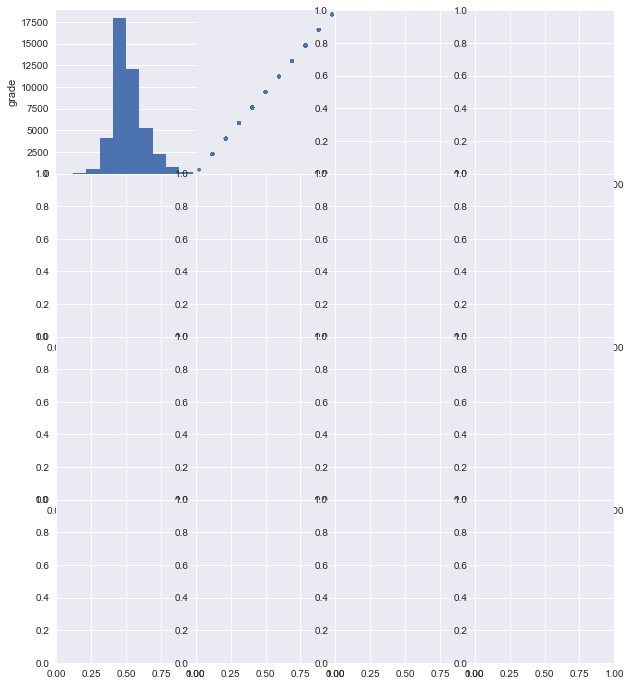

In [85]:
pd.plotting.scatter_matrix(df[x_cols], figsize=(10,12))

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


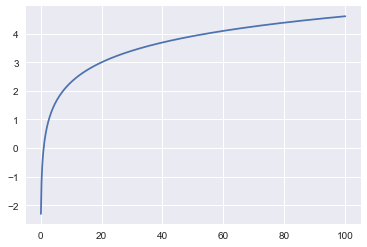

In [86]:
x = np.linspace(start=-100, stop=100, num=10**3) 
y = np.log(x) 
plt.plot(x, y)

TypeError: '<' not supported between instances of 'str' and 'int'

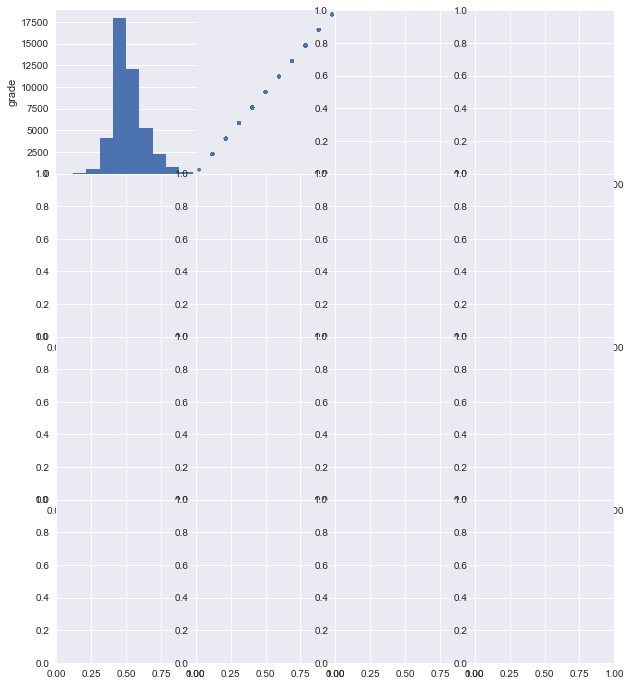

In [87]:
# transforming non-normal features
non_normal = ['bathrooms', 'sqft_living15']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df[x_cols], figsize=(10,12));

In [88]:
outcome = 'price'
x_cols = ['grade', 'bathrooms', 'sqft_living15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     6119.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:06:50   Log-Likelihood:            -3.0075e+05
No. Observations:               21597   AIC:                         6.015e+05
Df Residuals:                   21593   BIC:                         6.015e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.118e+06   5.15e+04    -41.160      0.000   -2.22e+06   -2.02e+06
grade[0]       8.664e+04   1192.158     72.679      0.000    8.43e+04     8.9e+04
grade[1]       8.664e+04   1192.158     72.679      0.000    8.43e+04     8.9e+04
bathrooms      9593.6666   6288.811      1.526      0.127   -2732.868    2.19e+04
sqft_living15  1.757e+05   7954.890     22.093      0.000     1.6e+05    1.91e+05
==============================================================================
Omnibus:                    20272.998   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2289027.574
Skew:                           4.187   Prob(JB):                         0.00
Kurtosis:                      52.735   Cond. No.                     2.84e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.75e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Multiple Linear Regression

In [ ]:
f = 'price ~ bedrooms + grade + sqft_living15'
model = ols(formula=f, data=df).fit()
model.summary()

In [ ]:
features = ['bedrooms', 'grade', 'sqft_living15']
X = df[features]
y = df.price

mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 

print(mlr.coef_)

In [ ]:
list(zip(features, mlr.coef_))

In [1]:
# 12/7/2020